# Polarization of light

We will plot the components of electric fields with different polarizations, to illustrate the role of phase and magnitude of the field components (note that the same behaviour occurs in the magnetic fields).  For a wave propagating in the $z$ direction, i.e. with wavevector $\mathbf{k} = (0,0,k_{z})$, the electric field takes the general form:

$$\mathbf{E}(\mathbf{r}) = \mathbf{E}_0 \exp i\left(k_{z}z - \omega t + \phi_{x}\right)$$

where the electric field vector is confined to the $x-y$ plane (the field is always perpendicular to the wavevector).  The vector prefactor $\mathbf{E}_0$ determines the relative magnitudes of the $x$- and $y$-components of the field, as well as their phase.  If we take the real part (as this is what is physical) and resolve the prefactor, then we can write the components of the field as:

$$E_{x} = E_{0x}\cos(k_{z}z - \omega t + \phi_x)$$
$$E_{y} = E_{0y}\cos(k_{z}z - \omega t + \phi_x - \phi)$$

where $\phi$ is the phase difference between the components of the field, and $\phi_x$ is an overall phase offset which determines the wave phase at $t=0$ (note that I left the phases in the prefactor in the first equation in the notes).

Throughout these notes, I'm going to leave $\phi_x = 0$ as it only changes the starting point of the waves; feel free to change it and explore the effect; the important quantity is $\phi$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set period and wavevector 
k = np.array((0.0,0.0,2*np.pi))     # Units of 1/m, gives wavelength of 1m, propagating along z
omega = 2*np.pi                     # radians/s
period = 2*np.pi/omega              # s

# Set up time as an array, covering two periods; we will pick a point in space
n_points = 1001
total_t = 2*period
time = np.linspace(0,total_t,n_points)

# Choose an arbitrary position while time varies; we can of course vary position as well
pos = np.array((0.0,0.0,1.0))

## Linear polarisation

We will start with a phase difference of $\phi = 0$ between the $x$- and $y$-components of the field, and also set the overall phase difference $\phi_x = 0$.  We'll assume different prefactors $E_{0x}$ and $E_{0y}$

In [3]:
phi_lin = 0
phi_x_lin = 0
E0x_lin = 1.0 # V/m
E0y_lin = 2.0 # V/m
Ex_lin = E0x_lin*np.cos(np.dot(k,pos) - omega*time+phi_x_lin)
Ey_lin = E0y_lin*np.cos(np.dot(k,pos) - omega*time+phi_x_lin - phi_lin)

We'll plot the components against time first of all; it's clear that they are in phase with each other.

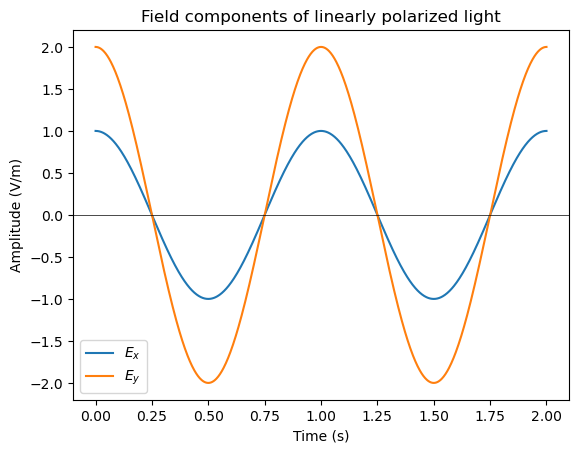

In [4]:
plt.plot(time,Ex_lin,label=r'$E_{x}$')
plt.plot(time,Ey_lin,label=r'$E_{y}$')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V/m)")
plt.axhline(c='k',lw=0.5)
plt.title("Field components of linearly polarized light")
plt.legend()

Now we'll plot the fields in the x-y plane (as if we were looking along the direction of propagation).  I'm setting up the axes so that they have the same scale, to help show the pattern that the fields make.

Text(0.5, 1.0, 'Electric field components for linear polarisation')

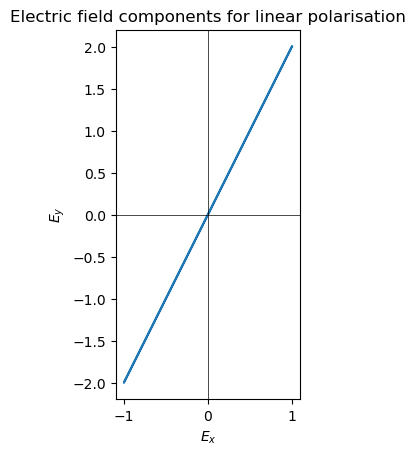

In [5]:
plt.plot(Ex_lin,Ey_lin)
plt.axis('scaled')
plt.xlabel(r'$E_x$')
plt.ylabel(r'$E_y$')
plt.axhline(c='k',lw=0.5)
plt.axvline(c='k',lw=0.5)
plt.title('Electric field components for linear polarisation')

The angle that the line makes with the respect to the x-axis is determined by the relative sizes of the field components, $E_{0x}$ and $E_{0y}$.  You might like to experiment with the effect of changing these numbers to help understand this.

## Circular polarisation

Here we have an even more specialised case than for linear polarisation: the phase difference $\phi = \pi/2$ or $3\pi/2$, and the field components have identical magnitude: $E_{0x} = E_{0y}$.

In [6]:
phi_circ = np.pi/2
phi_x_circ = 0
E0x_circ = 1.0 # V/m
E0y_circ = 1.0 # V/m
Ex_circ = E0x_circ*np.cos(np.dot(k,pos) - omega*time+phi_x_circ)
Ey_circ = E0y_circ*np.cos(np.dot(k,pos) - omega*time+phi_x_circ - phi_circ)

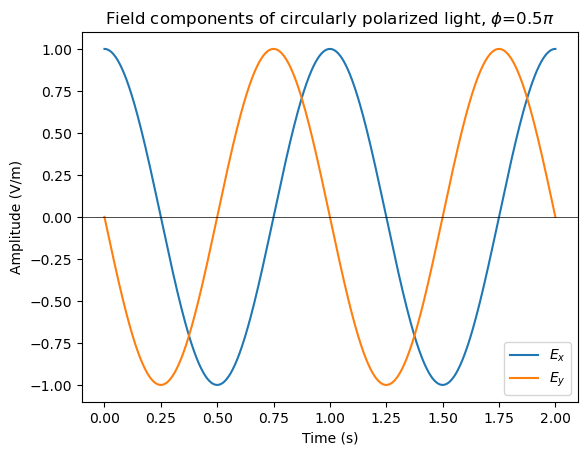

In [7]:
plt.plot(time,Ex_circ,label=r'$E_{x}$')
plt.plot(time,Ey_circ,label=r'$E_{y}$')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V/m)")
plt.axhline(c='k',lw=0.5)
plt.title(f"Field components of circularly polarized light, $\phi$={phi_circ/np.pi}$\pi$")
plt.legend()

This behaviour is what we expect with a $\pi/2$ phase difference; it's much clearer when we plot in the $x-y$ plane:

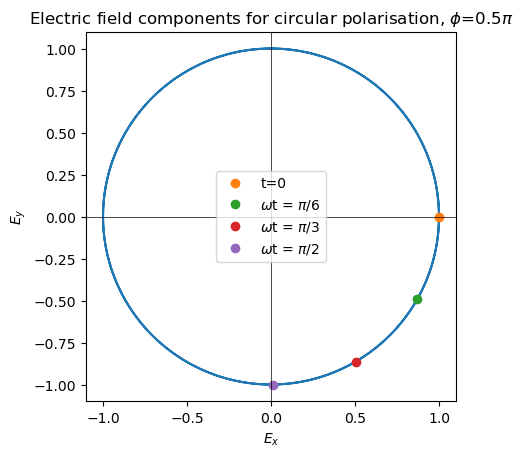

In [8]:
# Plot field in x-y plane
plt.plot(Ex_circ,Ey_circ)

# Plot the field at a set of specific times (snapshots) with points
dt = total_t/(n_points-1)
t_snap = 0
plt.plot(Ex_circ[t_snap],Ey_circ[t_snap],'o',label='t=0')
t_snap = int((np.pi/6)/(omega*dt))
plt.plot(Ex_circ[t_snap],Ey_circ[t_snap],'o',label=r'$\omega$t = $\pi$/6')
t_snap = int((np.pi/3)/(omega*dt))
plt.plot(Ex_circ[t_snap],Ey_circ[t_snap],'o',label=r'$\omega$t = $\pi$/3')
t_snap = int((np.pi/2)/(omega*dt))
plt.plot(Ex_circ[t_snap],Ey_circ[t_snap],'o',label=r'$\omega$t = $\pi$/2')

# Add axis labels etc
plt.axhline(c='k',lw=0.5)
plt.axvline(c='k',lw=0.5)
plt.axis('scaled')
plt.xlabel(r'$E_x$')
plt.ylabel(r'$E_y$')
plt.title(f'Electric field components for circular polarisation, $\phi$={phi_circ/np.pi}$\pi$')
plt.legend()

We see that the field vectors trace out a circle over time, as we expect from the form of the equations (if the $x$-component is a cosine, then with a $\pi/2$ phase difference the $y$-component will be a sine, and these are the standard equations for circular motion).  I have added points at successive times so that we can see the direction (clockwise for $\phi=\pi/2$).  You might like to think about what would happen for $\phi=3\pi/2$, and then change the value above and rerun.

## Elliptically polarized light

This is the most common form of polarization, found when either the components of the field have different amplitudes, or the phase difference is not exactly $0, \pi/2, \pi$ or $3\pi/2$, or both.  We'll start with a phase difference of $\pi/2$ and *different amplitudes* for the components of the field.

In [9]:
phi_ell1 = np.pi/2
phi_x_ell1 = 0
E0x_ell1 = 1.0 # V/m
E0y_ell1 = 2.0 # V/m
Ex_ell1 = E0x_ell1*np.cos(np.dot(k,pos) - omega*time+phi_x_ell1)
Ey_ell1 = E0y_ell1*np.cos(np.dot(k,pos) - omega*time+phi_x_ell1 - phi_ell1)

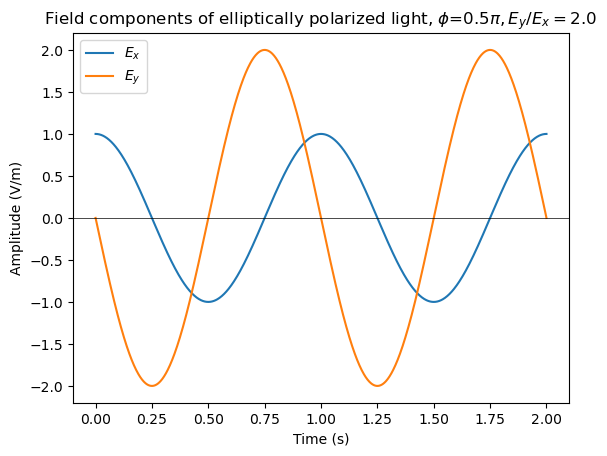

In [10]:
plt.plot(time,Ex_ell1,label=r'$E_{x}$')
plt.plot(time,Ey_ell1,label=r'$E_{y}$')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V/m)")
plt.axhline(c='k',lw=0.5)
plt.title(f'Field components of elliptically polarized light, $\phi$={phi_ell1/np.pi}$\pi, E_y/E_x=${E0y_ell1/E0x_ell1}') #', $E_x\ne E_y$')
plt.legend()

Text(0.5, 1.0, 'Field components for elliptically polarized light, $\\phi$=0.5$\\pi, E_y/E_x=$2.0')

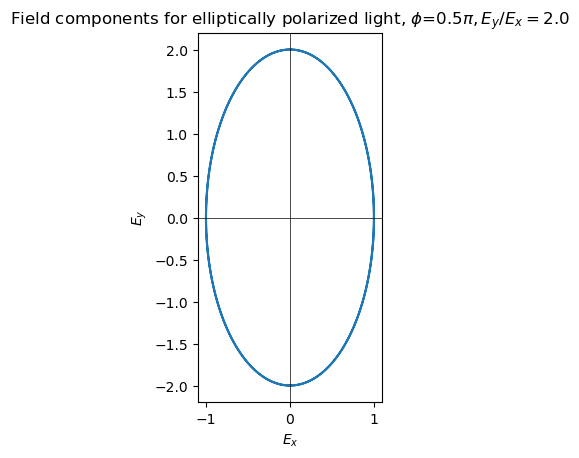

In [11]:
plt.plot(Ex_ell1,Ey_ell1)
plt.axis('scaled')
plt.xlabel(r'$E_x$')
plt.ylabel(r'$E_y$')
plt.axhline(c='k',lw=0.5)
plt.axvline(c='k',lw=0.5)
plt.title(f'Field components for elliptically polarized light, $\phi$={phi_ell1/np.pi}$\pi, E_y/E_x=${E0y_ell1/E0x_ell1}') #', $E_x\ne E_y$')

Now we will consider the *same amplitudes*, but a phase difference which is away from the exact values specified above.

In [12]:
phi_ell2 = 0.18*np.pi # No real significance to the factor; just not 0, 0.5, 1.0 or 1.5
phi_x_ell2 = 0
E0x_ell2 = 1.0 # V/m
E0y_ell2 = 1.0 # V/m
Ex_ell2 = E0x_ell2*np.cos(np.dot(k,pos) - omega*time+phi_x_ell2)
Ey_ell2 = E0y_ell2*np.cos(np.dot(k,pos) - omega*time+phi_x_ell2 - phi_ell2)

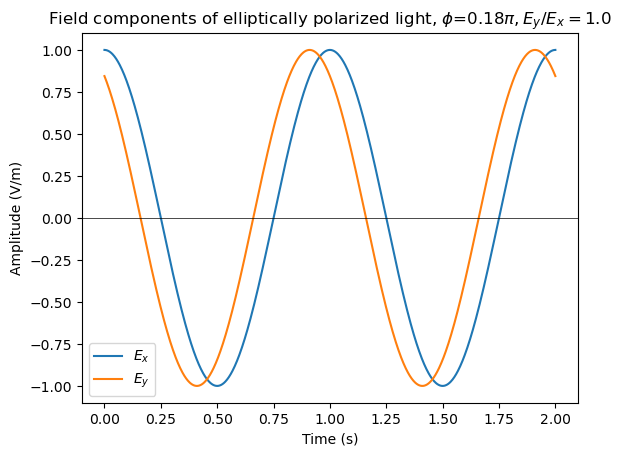

In [13]:
plt.plot(time,Ex_ell2,label=r'$E_{x}$')
plt.plot(time,Ey_ell2,label=r'$E_{y}$')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V/m)")
plt.axhline(c='k',lw=0.5)
plt.title(f'Field components of elliptically polarized light, $\phi$={phi_ell2/np.pi}$\pi, E_y/E_x=${E0y_ell2/E0x_ell2}') #', $E_x\ne E_y$')
plt.legend()

Text(0.5, 1.0, 'Field components of elliptically polarized light, $\\phi$=0.5$\\pi, E_y/E_x=$2.0')

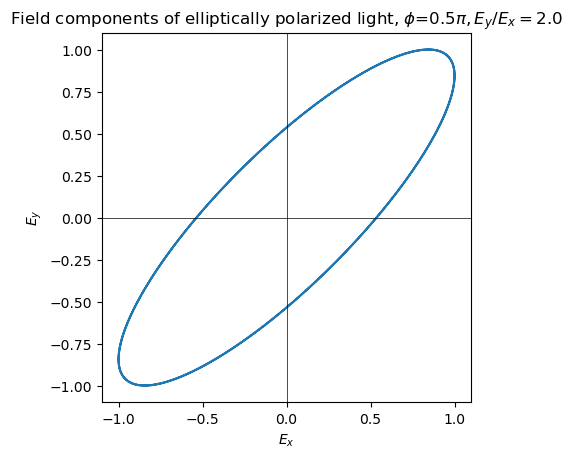

In [14]:
plt.plot(Ex_ell2,Ey_ell2)
plt.axis('scaled')
plt.xlabel(r'$E_x$')
plt.ylabel(r'$E_y$')
plt.axhline(c='k',lw=0.5)
plt.axvline(c='k',lw=0.5)
plt.title(f'Field components of elliptically polarized light, $\phi$={phi_ell1/np.pi}$\pi, E_y/E_x=${E0y_ell1/E0x_ell1}') #', $E_x\ne E_y$')

Here, the angle that the ellipse makes with $x$-axis is determined by the ratio of the amplitudes of the field components, $E_{0x}$ and $E_{0y}$, while the difference between the semi-major and semi-minor axes of the ellipse (how far away from circular the ellipse is) is determined by the phase difference $\phi$.  I would encourage you to explore how these variables, `phi_ell2`, `E0x_ell2`, and `E0y_ell2`, affect the appearance of the ellipse (here, or below, where we consider the general case).

## General elliptical polarization

Now I will plot a case where the field components have different magnitudes, and the phase difference is not one of the four special values.

In [15]:
phi_ell3 = 0.31*np.pi # No significance to the factor; just not 0, 0.5, 1.0 or 1.5
phi_x_ell3 = 0.0
E0x_ell3 = 2.0
E0y_ell3 = 1.0
Ex_ell3 = E0x_ell3*np.cos(np.dot(k,pos) - omega*time+phi_x_ell3)
Ey_ell3 = E0y_ell3*np.cos(np.dot(k,pos) - omega*time+phi_x_ell3 - phi_ell3)

Text(0.5, 1.0, 'Field components of elliptically polarized light, $\\phi$=0.31$\\pi, E_y/E_x=$0.5')

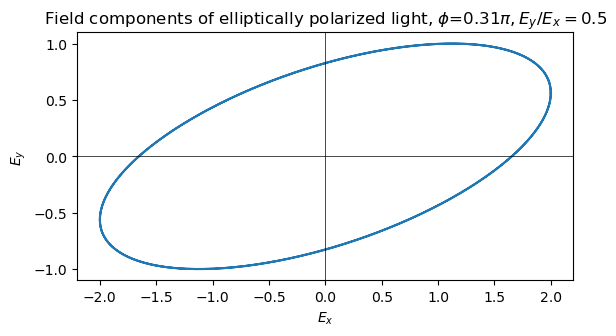

In [16]:
plt.plot(Ex_ell3,Ey_ell3)
plt.axis('scaled')
plt.xlabel(r'$E_x$')
plt.ylabel(r'$E_y$')
plt.axhline(c='k',lw=0.5)
plt.axvline(c='k',lw=0.5)
plt.title(f'Field components of elliptically polarized light, $\phi$={phi_ell3/np.pi}$\pi, E_y/E_x=${E0y_ell3/E0x_ell3}') #', $E_x\ne E_y$')

## Time evolution of the electric field vector

The final thing that we will consider is how the field vector evolves in time: so far we have been plotting in such a way that this cannot be seen.  I will plot a set of snapshots of the field vector, with the overall path shown for clarity, so that you can see how this evolves over time.  (It is possible to animate things in python, and you are welcome to try if you would like, but I often find that this can hide some information.)

I will show the overall path with a continuous line, and the position of the tip of the electric field vector at a specific time with a dot.

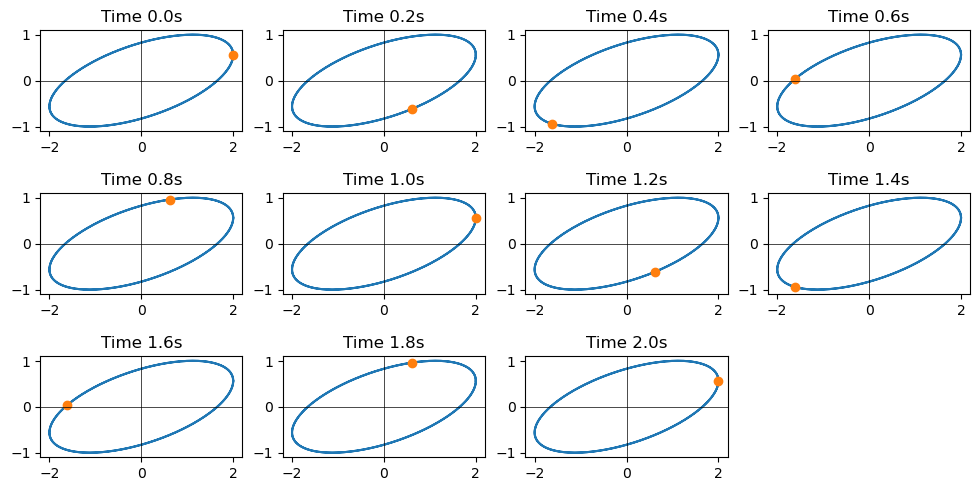

In [17]:
dt = total_t/(n_points-1)
fig_time = plt.figure(figsize=(12,6))
index = 1

# Iterate over points in time and plot at specific points
for i in range(0,n_points,100):
    ax = fig_time.add_subplot(3,4,index,aspect='equal')
    ax.plot(Ex_ell3,Ey_ell3)
    ax.plot(Ex_ell3[i],Ey_ell3[i],'o')
    ax.axhline(c='k',lw=0.5)
    ax.axvline(c='k',lw=0.5)
    ax.set_title(f"Time {i*dt:3.1f}s")
    index += 1

Using this kind of plot, you could experiment with the effect of the overall phase, $\phi_x$: you should see that the *starting* point of the wave changes (moves to a different point on the ellipse) but nothing else does.  This is set by the variable `phi_x_ell3` above (and similar variables earlier).

## Plotting in 3D

Finally, I provide some plots where we can see the path that the tip of the wavevector takes in 3D.  It took a while to find a clear way to do this: it can be very dependent on viewpoint, and it's easy to lose context.  What I have done is to plot the path of the wave in 3D as well as *projections* in different directions so that you can effectively combine all the plots above in one.  The z axis in this case is effectively time *and* the z coordinate (since the waves are propagating along z).

In all these plots, you can adjust the viewing angle by changing the command `ax3dN.view_init(20,80)` (where `N` refers to the particular plot).

### Linear polarization

This is most straightforward: we get the cosine shape that is expect as the electric field is confined to a single plane.

Text(0.5, 0, 't')

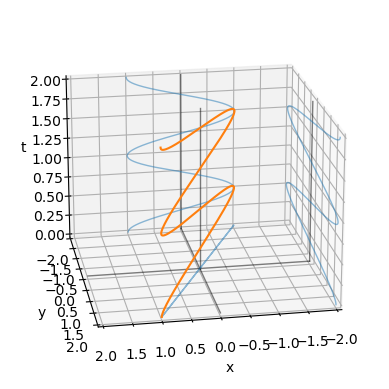

In [18]:
# Set up 3D figure
fig_3d1 = plt.figure()
ax3d1 = fig_3d1.add_subplot(111,projection='3d')

# Viewpoint (elevation, azimuth) and axis limits
ax3d1.view_init(20,80)
ax3d1.set_xlim(-2,2)
ax3d1.set_ylim(-2,2)

# These lines will serve as zero axes to aid the eye
linexy = np.linspace(-2,2,2)
linez = np.linspace(0,2,2)
linezero = np.zeros(2)
linem2 = -2*np.ones(2)

# Add lines to indicate axes using thin lines with reduced alpha
ax3d1.plot(linexy,linezero,linezero,'k-', linewidth=1,alpha=0.5)
ax3d1.plot(linezero,linexy,linezero,'k-', linewidth=1,alpha=0.5)
ax3d1.plot(linezero,linezero,linez,'k-', linewidth=1,alpha=0.5)
ax3d1.plot(linem2,linezero,linez,'k-', linewidth=1,alpha=0.5)
ax3d1.plot(linezero,linem2,linez,'k-', linewidth=1,alpha=0.5)

# Plot projection of wave against time in x and y planes
ax3d1.plot(Ex_lin,omega*time/k[2], zs=-2, zdir='y',linewidth=1,alpha=0.5,color='C0')
ax3d1.plot(Ey_lin,omega*time/k[2], zs=-2, zdir='x',linewidth=1,alpha=0.5,color='C0')

# Project wave onto x-y plane 
ax3d1.plot(Ex_lin, Ey_lin, zs=0, zdir='z',linewidth=1,alpha=0.5)

# Plot wave in 3D (finally!)
ax3d1.plot(Ex_lin,Ey_lin,omega*time/k[2])

# Label axes
ax3d1.set_xlabel('x')
ax3d1.set_ylabel('y')
ax3d1.set_zlabel('t')

### Circular polarization

Here we see the sinusoidal paths in x and y, but the overall circular motion (in the x-y plane) should be clear.

Text(0.5, 0, 't')

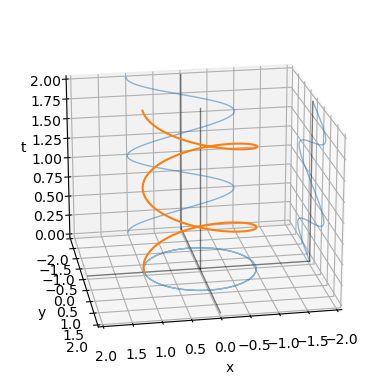

In [19]:
# Set up 3D figure
fig_3d2 = plt.figure()
ax3d2 = fig_3d2.add_subplot(111,projection='3d')

# Viewpoint (elevation, azimuth) and axis limits
ax3d2.view_init(20,80)
ax3d2.set_xlim(-2,2)
ax3d2.set_ylim(-2,2)

# Add lines to indicate axes using thin lines with reduced alpha
ax3d2.plot(linexy,linezero,linezero,'k-', linewidth=1,alpha=0.5)
ax3d2.plot(linezero,linexy,linezero,'k-', linewidth=1,alpha=0.5)
ax3d2.plot(linezero,linezero,linez,'k-', linewidth=1,alpha=0.5)
ax3d2.plot(linem2,linezero,linez,'k-', linewidth=1,alpha=0.5)
ax3d2.plot(linezero,linem2,linez,'k-', linewidth=1,alpha=0.5)

# Plot projection of wave against time in x and y planes
ax3d2.plot(Ex_circ,omega*time/k[2], zs=-2, zdir='y',linewidth=1,alpha=0.5,color='C0')
ax3d2.plot(Ey_circ,omega*time/k[2], zs=-2, zdir='x',linewidth=1,alpha=0.5,color='C0')

# Project wave onto x-y plane 
ax3d2.plot(Ex_circ, Ey_circ, zs=0, zdir='z',linewidth=1,alpha=0.5)

# Plot wave in 3D (finally!)
ax3d2.plot(Ex_circ,Ey_circ,omega*time/k[2])

# Label axes
ax3d2.set_xlabel('x')
ax3d2.set_ylabel('y')
ax3d2.set_zlabel('t')

### Elliptical polarization

I have chosen the final example, but you could plot `Ex_ell1` or `Ex_ell2` (and equivalent y variables) if you wanted to explore.

Text(0.5, 0, 't')

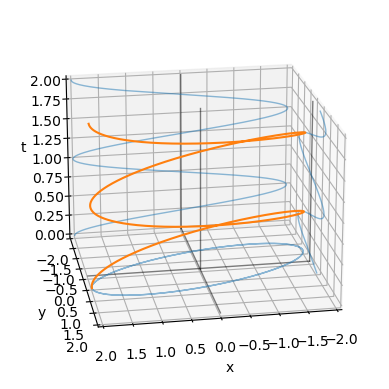

In [20]:
# Set up 3D figure
fig_3d3 = plt.figure()
ax3d3 = fig_3d3.add_subplot(111,projection='3d')

# Viewpoint (elevation, azimuth) and axis limits
ax3d3.view_init(20,80)
ax3d3.set_xlim(-2,2)
ax3d3.set_ylim(-2,2)

# Add lines to indicate axes using thin lines with reduced alpha
ax3d3.plot(linexy,linezero,linezero,'k-', linewidth=1,alpha=0.5)
ax3d3.plot(linezero,linexy,linezero,'k-', linewidth=1,alpha=0.5)
ax3d3.plot(linezero,linezero,linez,'k-', linewidth=1,alpha=0.5)
ax3d3.plot(linem2,linezero,linez,'k-', linewidth=1,alpha=0.5)
ax3d3.plot(linezero,linem2,linez,'k-', linewidth=1,alpha=0.5)

# Plot projection of wave against time in x and y planes
ax3d3.plot(Ex_ell3,omega*time/k[2], zs=-2, zdir='y',linewidth=1,alpha=0.5,color='C0')
ax3d3.plot(Ey_ell3,omega*time/k[2], zs=-2, zdir='x',linewidth=1,alpha=0.5,color='C0')

# Project wave onto x-y plane 
ax3d3.plot(Ex_ell3, Ey_ell3, zs=0, zdir='z',linewidth=1,alpha=0.5)

# Plot wave in 3D (finally!)
ax3d3.plot(Ex_ell3,Ey_ell3,omega*time/k[2])

# Label axes
ax3d3.set_xlabel('x')
ax3d3.set_ylabel('y')
ax3d3.set_zlabel('t')